<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-do-we-need-this-for?" data-toc-modified-id="What-do-we-need-this-for?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What do we need this for?</a></span></li><li><span><a href="#Basic-iGraph-functionality" data-toc-modified-id="Basic-iGraph-functionality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic iGraph functionality</a></span><ul class="toc-item"><li><span><a href="#Load-a-text-file-into-an-iGraph-graph" data-toc-modified-id="Load-a-text-file-into-an-iGraph-graph-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load a text file into an iGraph graph</a></span></li><li><span><a href="#Inspect-the-results" data-toc-modified-id="Inspect-the-results-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Inspect the results</a></span></li><li><span><a href="#Plot-the-graph" data-toc-modified-id="Plot-the-graph-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot the graph</a></span></li><li><span><a href="#Calculate-a-metric-about-the-graph" data-toc-modified-id="Calculate-a-metric-about-the-graph-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculate a metric about the graph</a></span></li></ul></li><li><span><a href="#Working-with-arrays,-tables,-and-plots" data-toc-modified-id="Working-with-arrays,-tables,-and-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with arrays, tables, and plots</a></span><ul class="toc-item"><li><span><a href="#Selecting" data-toc-modified-id="Selecting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Selecting</a></span></li><li><span><a href="#Sorting" data-toc-modified-id="Sorting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sorting</a></span></li><li><span><a href="#Counting-frequencies" data-toc-modified-id="Counting-frequencies-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Counting frequencies</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#Quick-refresher-on-logs" data-toc-modified-id="Quick-refresher-on-logs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quick refresher on logs</a></span></li><li><span><a href="#Other-resources" data-toc-modified-id="Other-resources-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Other resources</a></span></li></ul></div>

In [1]:
library(igraph)
library(ggplot2)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## What do we need this for?

Basically, working with network data is complicated for two reasons:
- **The type of data you need to store is a bit unusual** - it's not just a standard table, because you need (1) information on edges (2) information on nodes. So, often these packages create custom "graph" objects that can store data on both.
- **The type of calculations you need to do are a bit unusual** - for example you might want to calculate degrees or pagerank. So, they also contain custom methods that help you do this with very little code.

That is why we use packages like [iGraph](https://igraph.org/r/doc/) or [NetworkX](https://networkx.github.io/documentation/stable/) - they just make it easier on us, though we could theoretically code the calculations by hand ourselves.

Let's try it out!

## Basic iGraph functionality

### Load a text file into an iGraph graph

Let's take a sample, classic graph: [Zachary's Karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). The data we will be using can be found [here](https://raw.githubusercontent.com/khof312/msba_network_analytics/master/data/zachary.txt).

(Actually, the network is already included in the iGraph package, but just to show how one would read in an external file...)

In [2]:
# Let's take our text file of space-separated edges and put it into an iGraph graph
karate <- read.graph(file="data/zachary.txt", format ="ncol")
karate

IGRAPH e58b6ac UN-- 34 78 -- 
+ attr: name (v/c)
+ edges from e58b6ac (vertex names):
 [1] 0 --1  0 --2  0 --3  0 --4  0 --5  0 --6  0 --7  0 --8  0 --10 0 --11
[11] 0 --12 0 --13 0 --17 0 --19 0 --21 0 --31 1 --2  1 --3  1 --7  1 --13
[21] 1 --17 1 --19 1 --21 1 --30 2 --3  2 --7  2 --8  2 --9  2 --13 2 --27
[31] 2 --28 2 --32 3 --7  3 --12 3 --13 4 --6  4 --10 5 --6  5 --10 5 --16
[41] 6 --16 8 --30 8 --32 8 --33 9 --33 13--33 32--14 33--14 32--15 33--15
[51] 32--18 33--18 19--33 32--20 33--20 32--22 33--22 23--25 27--23 23--29
[61] 32--23 33--23 25--24 27--24 31--24 31--25 29--26 33--26 27--33 31--28
[71] 28--33 32--29 33--29 30--32 30--33 31--32 31--33 32--33

### Inspect the results

The graph object prints out some useful information:

<img src="fig/igraph_output_annotated.png" width=80% align="left">

Alternatively, we can manually inspect:

In [3]:
# How many nodes?
vcount(karate)

# How many edges?
ecount(karate)

[1] 34

[1] 78

In [4]:
# Get nodes
V(karate)

# Get edges
E(karate)

+ 34/34 vertices, named, from e58b6ac:
 [1] 0  1  2  3  4  5  6  7  8  10 11 12 13 17 19 21 31 30 9  27 28 32 16 33 14
[26] 15 18 20 22 23 25 29 24 26

+ 78/78 edges from e58b6ac (vertex names):
 [1] 0 --1  0 --2  0 --3  0 --4  0 --5  0 --6  0 --7  0 --8  0 --10 0 --11
[11] 0 --12 0 --13 0 --17 0 --19 0 --21 0 --31 1 --2  1 --3  1 --7  1 --13
[21] 1 --17 1 --19 1 --21 1 --30 2 --3  2 --7  2 --8  2 --9  2 --13 2 --27
[31] 2 --28 2 --32 3 --7  3 --12 3 --13 4 --6  4 --10 5 --6  5 --10 5 --16
[41] 6 --16 8 --30 8 --32 8 --33 9 --33 13--33 32--14 33--14 32--15 33--15
[51] 32--18 33--18 19--33 32--20 33--20 32--22 33--22 23--25 27--23 23--29
[61] 32--23 33--23 25--24 27--24 31--24 31--25 29--26 33--26 27--33 31--28
[71] 28--33 32--29 33--29 30--32 30--33 31--32 31--33 32--33

In [5]:
# Is the graph directed?
is.directed(karate)

[1] FALSE

### Plot the graph

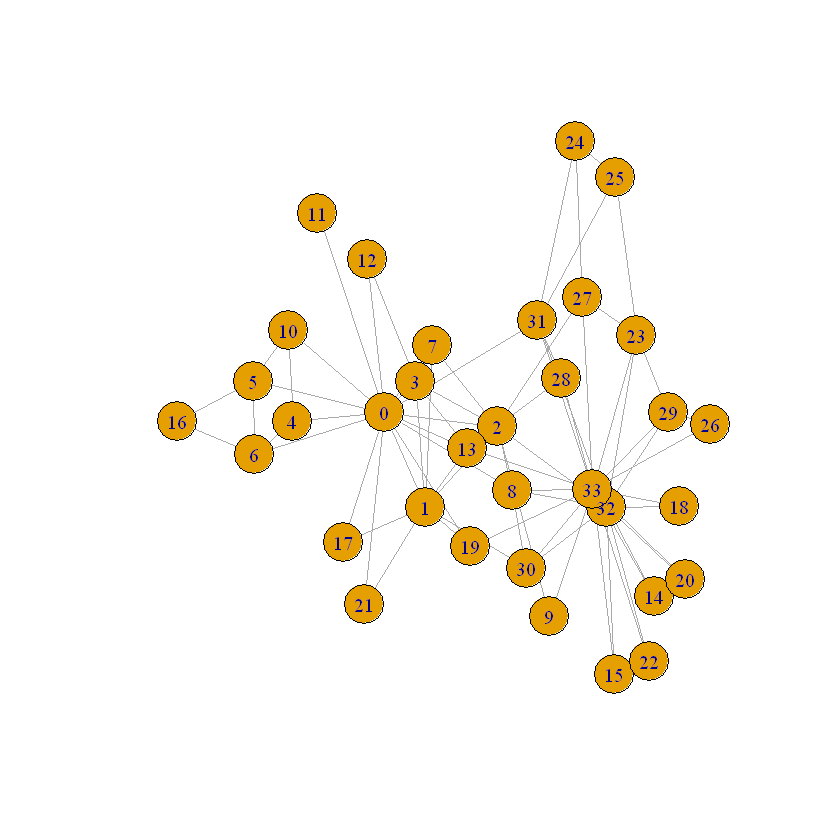

In [6]:
plot.igraph(karate)

### Calculate a metric about the graph

For illustration purposes, let's get the betweenness scores for all nodes. The universe of possibilities, in terms of what you can do/compute using iGraph, can be found [here](https://igraph.org/r/doc/).

In [7]:
btw <- betweenness(karate)

# I will round it to 2 digits just so that it's easier to read
btw <- round(btw, 2)
btw

0      1      2      3      4      5      6      7      8     10     11 
231.07  28.48  75.85   6.29   0.33  15.83  15.83   0.00  29.53   0.33   0.00 
    12     13     17     19     21     31     30      9     27     28     32 
  0.00  24.22   0.00  17.15   0.00  73.01   7.61   0.45  11.79   0.95  76.69 
    16     33     14     15     18     20     22     23     25     29     24 
  0.00 160.55   0.00   0.00   0.00   0.00   0.00   9.30   2.03   1.54   1.17 
    26 
  0.00

## Working with arrays, tables, and plots

### Selecting

In [8]:
# Get the betweenness scores for node 32
btw[c("32")]

32 
76.69

<span style="color:red"> NOTE for cell above: It is important that you surround the index with quotation marks. This suggests that you want the array element with _name_ 32 (on the left, in bold above), rather than the 32nd item in the array.

In [9]:
btw[32]

29 
1.54

<img src="fig/igraph_named_index_annotated.png" width=50% align="left">

### Sorting

In [10]:
# Sort the betweenness scores
sort(btw)

7     11     12     17     21     16     14     15     18     20     22 
  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00 
    26      4     10      9     28     24     29     25      3     30     23 
  0.00   0.33   0.33   0.45   0.95   1.17   1.54   2.03   6.29   7.61   9.30 
    27      5      6     19     13      1      8     31      2     32     33 
 11.79  15.83  15.83  17.15  24.22  28.48  29.53  73.01  75.85  76.69 160.55 
     0 
231.07

### Counting frequencies

In [11]:
# Get the unique values of betweenness scores, and their count; we'll use a dataframe so the result is easier to read
data.frame(table(btw))

btw,Freq
<fct>,<int>
0,12
0.33,2
0.45,1
0.95,1
1.17,1
1.54,1
2.03,1
6.29,1
7.61,1


### Plotting

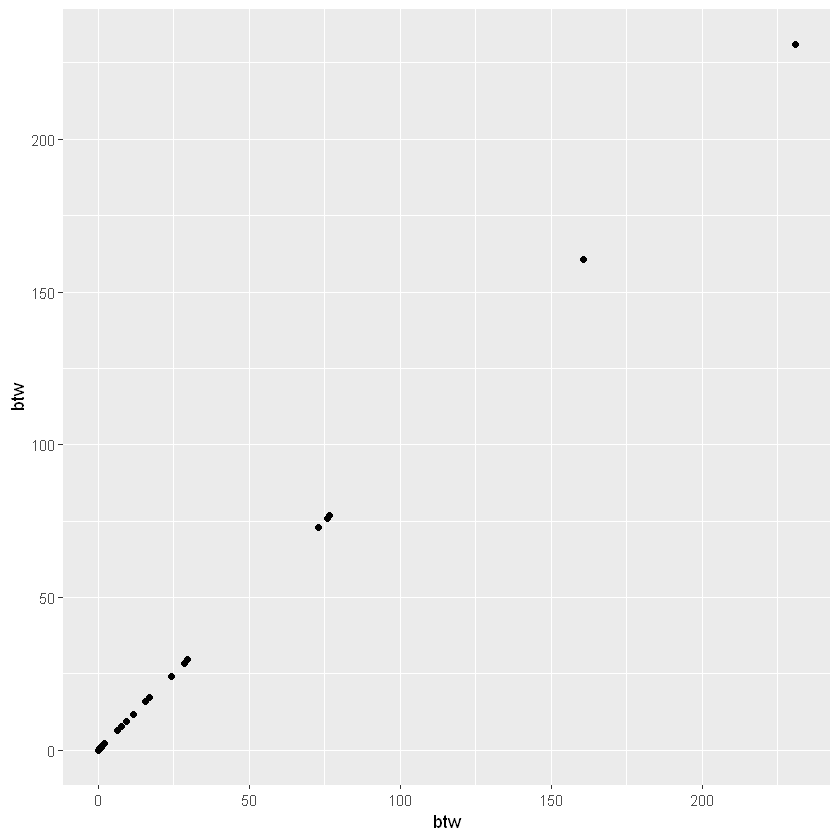

In [12]:
# For illustrating how to use ggplot, let's just make a nonsensical scatterplot of betweenness against itself
ggplot(data.frame(btw), aes(x=btw, y=btw)) + geom_point()

## Quick refresher on logs

Recall that 
$ \log_b(a)$
is "the power to which $b$ must be raised to get $a$".

Recall also that:

- $\log_b(1) = 0$ 

- $\log_b(0) = $ undefined, with a limit of $-\infty$


In [13]:
# Let's test this out!
test <- c(0,1,2,3,2,1,0,1,2,3)
test

[1] 0 1 2 3 2 1 0 1 2 3

In [14]:
# Let's make test into a data frame, and add a column with the log
test_df              <- data.frame(test)
test_df['log(test)'] <- log10(test_df$test)

In [15]:
# Now, we can see that our zeroes are converted to infinities when we take the log
test_df

test,log(test)
<dbl>,<dbl>
0,-Inf
1,0.0000000
2,0.3010300
3,0.4771213
2,0.3010300
1,0.0000000
0,-Inf
1,0.0000000
2,0.3010300


In your homework, you'll address this problem by increasing the zeroes by 0.1 before you take the log.

## Other resources

Other useful resources are:
- [Network Visualization with R](http://kateto.net/network-visualization) by Katya Ognyanova
- [Data Camp](https://www.datacamp.com/search?q=network%20analysis) with tutorials for R and Python

My Python tutorial for NetworkX, and a list of additional resources, can be found [here](https://github.com/khof312/networks_tutorial).